# KING COUNTY HOUSING PRICE PREDICTIONS

Please fill out:
* Student name: Scholar Chepkirui 
* Student pace: part time 
* Scheduled project review date/time: 15/12/2022
* Instructor name: Asha Deen/ Rose Delilah/ Noah Kandie 
* Blog post URL:


## Project overview
This project uses regression modeling to analyze house sales in King County. The final model can predict the price of a house based on various features, hence it will be used by a real estate agency to establish a realistic asking price. The findings from the model shows the house features that have a great impact on the price of a house based on past sales. These findings can be used by the real estate agency to advise homeowners on any improvements that can be made to increase the house price.    

## Business problem

There is a real estate agency in King County that helps homeowners sell homes. The agency has 18 house unique features that it considers when estimating the value of a house. Due to the many house features available, the real estate agency has a difficulty in establishing a realistic asking price. Additionally, the real estate agency advises homeowners on how to increase the estimated value of their homes, such as by doing home renovations. However, they are not really sure if the advice given has a great impact on the house price value.  
This project aims to build a  model that  can predict the price of a house based on various features. This helps the agency in coming up with a realistic asking price. The findings obtained while building the model provides insights on the house features that have a greater impact on house price. From these findings, the agency can appropriately advise the homeowner on any improvements that can be made to increase the house price.   

## Import libraries and load the data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
%matplotlib inline

In [2]:
# load the dataset
house_data = pd.read_csv('data\kc_house_data.csv')

## Data understanding

In [3]:
#preview the dataset
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#number of rows and columns of house_data
print(f'house_data has {house_data.shape[0]} rows and {house_data.shape[1]} columns')

house_data has 21597 rows and 21 columns


In [5]:
#summary of house_data dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#summary statistics of house_data
house_data.drop('id', axis=1).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# unique values of some columns
for column in ['bedrooms', 'bathrooms', 'floors',  'waterfront', 'view', 'yr_renovated']:
    print(f'{column.upper()}:')
    print(house_data[column].value_counts())
    print('********************************')

BEDROOMS:
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
********************************
BATHROOMS:
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
********************************
FLOORS:
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64
********************************
WATERFRONT:
0.0    19075
1.0      146
Name: waterfront, dtype: int64
********************************
VIEW:
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
*

price column is the target variable in this dataset. The visualization below shows the distribution of the house prices. 

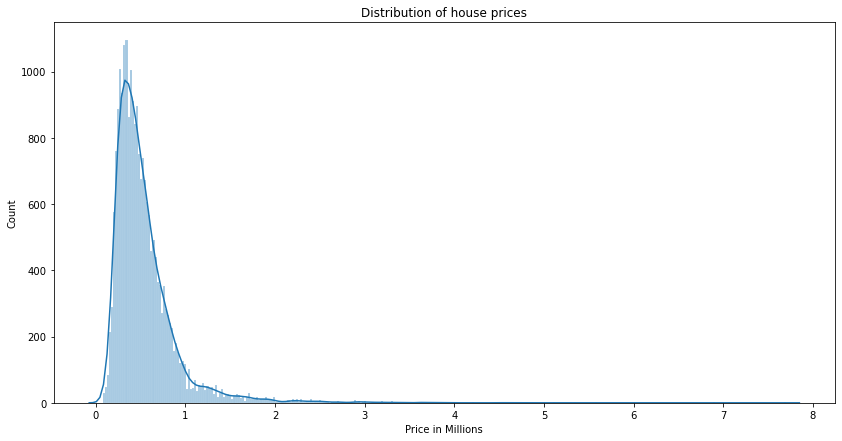

In [8]:
# Distribution of house prices
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(house_data['price']/1000000, kde=True, kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
ax.set_title('Distribution of house prices')
ax.set_xlabel('Price in Millions');

The distribution is positively skewed. Most houses have a price around 500,000. There are very few houses with prices greater than 2 Million. Log transformation would be applied to the price column to make the distribution less skewed.

## Data preparation

###  Check for duplicates

In [9]:
# check for duplicates
house_data.duplicated(subset = ['id', 'date']).value_counts()

False    21597
dtype: int64

The data has no duplicate records

### Handle missing values

In [10]:
#check for missing values
house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

To handle the missing values in the year_renovated,  view and waterfront columns of house_data, an assumption is made that the houses have not been renovated, have not been viewed and have no view to a waterfront.

In [11]:
# replace missing values with 0
house_data = house_data.fillna(0.0)

### Check for placeholders

In [12]:
#check for placeholders
house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [13]:
#replace placeholder '?' with 0
house_data['sqft_basement'] = house_data['sqft_basement'].str.replace('?', '0.0', regex=True)

In [14]:
# value counts of the sqft_basement column
house_data['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

### Fix wrong data types

In [15]:
# fix the wrong data types
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['sqft_basement'] = house_data['sqft_basement'].apply(float).apply(int)
for column in ['waterfront', 'view', 'yr_renovated']:
    house_data[column] = house_data[column].apply(int)

In [16]:
# check the data types
house_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Check for outliers

In [17]:
#unique bedroom values
house_data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

<AxesSubplot:xlabel='bedrooms'>

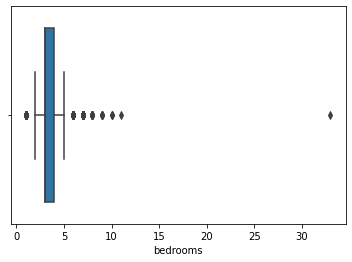

In [18]:
#boxplot showing the number of bedrooms
sns.boxplot(x = house_data['bedrooms'])

Bedrooms has some outliers. The house with 33 bedrooms will be dropped in this case.

In [19]:
# drop record with 33 bedrooms
house_data = house_data[house_data['bedrooms'] <= 11]

### Age of the house

In [20]:
# extract the year the house  was sold from the date column
house_data['year_sold'] = pd.DatetimeIndex(house_data['date']).year

In [21]:
# create a column for the house age
house_data['house_age'] = house_data['year_sold'] - house_data['yr_built']
#check unique values of house_age
house_data['house_age'].unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1],
      dtype=int64)

In [22]:
# preview of records with house_age of -1 
house_data[house_data['house_age'] == -1].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age
1761,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,...,710,2015,0,98040,47.5784,-122.226,2230,10000,2014,-1
2685,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,0,2015,0,98144,47.5756,-122.316,1440,4800,2014,-1
7519,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,...,0,2015,0,98072,47.7685,-122.160,2520,6126,2014,-1
8032,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,200,2015,0,98144,47.6001,-122.298,1320,1852,2014,-1
14475,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,290,2015,0,98199,47.6514,-122.385,1570,6000,2014,-1


In [23]:
# shape of records with house_age of -1 
house_data[house_data['house_age'] == -1].shape

(12, 23)

The 12 records above contain wrong values, since a house cannot be sold a year before it was built. These records are therefore dropped. 
Columns for drop year_sold, yr_built and date are dropped as they are no longer required.

In [24]:
# drop year_sold, yr_built and date columns
house_data = house_data.drop(['year_sold', 'yr_built', 'date'] , axis=1)
#drop rows with age of -1
house_data = house_data[house_data['house_age'] >= 0]
# check if the rows have been dropped
house_data[house_data['house_age'] == -1].head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age


### Categorical column for renovations

In [25]:
#create a new column 'renovations' to categorize yr_renovations 
house_data.loc[house_data['yr_renovated'] == 0, 'renovations'] = 'not renovated'
house_data.loc[house_data['yr_renovated'] != 0, 'renovations'] = 'renovated'

In [26]:
#preview dataset
house_data.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovations
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,0,98178,47.5112,-122.257,1340,5650,59,not renovated
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1991,98125,47.7210,-122.319,1690,7639,63,renovated
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,0,98028,47.7379,-122.233,2720,8062,82,not renovated


### Linear relationship between price and other variables

In [27]:
# house data correlation
house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
id,1.000000,-0.016681,0.001979,0.005158,-0.012251,-0.131930,0.018070,-0.003590,0.011751,-0.023628,0.008105,-0.010954,-0.004018,-0.010591,-0.008292,-0.001978,0.020718,-0.002753,-0.138598,-0.021203
price,-0.016681,1.000000,0.316080,0.526055,0.702181,0.089852,0.257212,0.264309,0.393557,0.035965,0.668270,0.605540,0.321079,0.117842,-0.053271,0.306784,0.021954,0.585271,0.082825,-0.054108
bedrooms,0.001979,0.316080,1.000000,0.527834,0.592960,0.033574,0.183977,-0.002062,0.080559,0.023409,0.366201,0.492203,0.303696,0.018623,-0.158379,-0.011760,0.136515,0.404402,0.031827,-0.161178
bathrooms,0.005158,0.526055,0.527834,1.000000,0.755668,0.088450,0.502745,0.063671,0.185961,-0.126371,0.665814,0.686574,0.278449,0.047234,-0.204805,0.024106,0.225131,0.569953,0.088359,-0.507750
sqft_living,-0.012251,0.702181,0.592960,0.755668,1.000000,0.173530,0.354238,0.104691,0.281591,-0.059387,0.762968,0.876388,0.428754,0.051094,-0.199737,0.052053,0.241386,0.756506,0.184399,-0.318826
sqft_lot,-0.131930,0.089852,0.033574,0.088450,0.173530,1.000000,-0.004589,0.021446,0.075054,-0.008902,0.114883,0.184192,0.015014,0.004949,-0.129492,-0.085439,0.230160,0.144717,0.718193,-0.053107
floors,0.018070,0.257212,0.183977,0.502745,0.354238,-0.004589,1.000000,0.020879,0.028343,-0.263753,0.458591,0.524470,-0.241870,0.003944,-0.060201,0.048868,0.126646,0.280604,-0.010497,-0.488989
waterfront,-0.003590,0.264309,-0.002062,0.063671,0.104691,0.021446,0.020879,1.000000,0.380596,0.016632,0.082880,0.071805,0.083058,0.073931,0.028971,-0.012129,-0.037669,0.083818,0.030646,0.024355
view,0.011751,0.393557,0.080559,0.185961,0.281591,0.075054,0.028343,0.380596,1.000000,0.045644,0.249083,0.165889,0.270771,0.090342,0.085147,0.006372,-0.077718,0.278856,0.073085,0.054449
condition,-0.023628,0.035965,0.023409,-0.126371,-0.059387,-0.008902,-0.263753,0.016632,0.045644,1.000000,-0.146672,-0.158859,0.168419,-0.055868,0.003115,-0.015009,-0.106062,-0.093114,-0.003186,0.360539


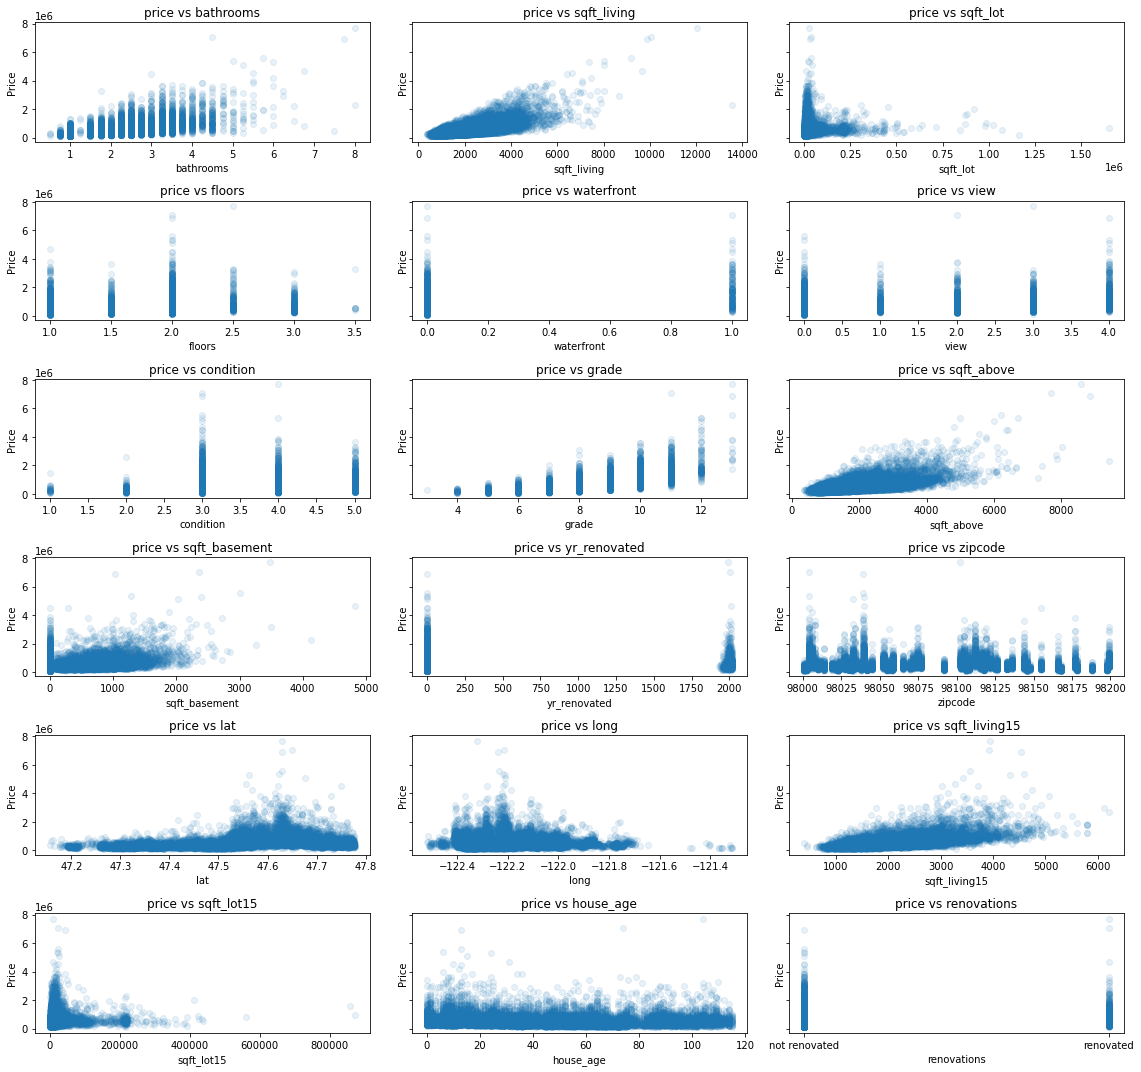

In [28]:
#scatter plots of price vs other columns
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,15), sharey=True )

for ax, column in zip(axes.flatten(), house_data.columns[3:]):
    ax.scatter(house_data[column], house_data['price'], label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
fig.tight_layout()

- Sqft_living has the highest positive correlation with price. 
- Price has a high positive correlation with bathrooms, grade, sqft_above, and sqft_living15.
- Price has low positive correlation with bedrooms, floors, waterfront, view, sqft_basement and latitude.
- Price has no clear relationship with sqft_lot, condition, house_age, yr_renovated, zipcode, longitude and sqft_lot15.

### Select predictor and target variables

Price is the target variable. House features to be used in modelling are bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_living15, sqft_lot, house_age and renovations.


In [29]:
# drop irrelevant columns
house_data = house_data.copy()
house_data = house_data.drop(['id', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_basement', 'view'] , axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15,house_age,renovations
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,1340,5650,59,not renovated
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1690,7639,63,renovated
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,2720,8062,82,not renovated
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,1360,5000,49,not renovated
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,1800,7503,28,not renovated


### Multicollinearity of features

In [30]:
# pairs with collinearity > 0.75
df = house_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876388
"(grade, sqft_living)",0.762968
"(sqft_living, sqft_living15)",0.756506
"(grade, sqft_above)",0.756277
"(sqft_living, bathrooms)",0.755668


In [31]:
# drop some columns to address the collinearity
house_data = house_data.drop(columns = ['sqft_above', 'sqft_living15', 'bathrooms', 'grade'])

In [32]:
# check column names
house_data.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'sqft_lot15', 'house_age', 'renovations'],
      dtype='object')

### Train-test Split

The model will be trained on just the train set, then we will compare its predictions on the test set to the actual prices on the test set.

In [33]:
# split the data into a train set and test set
y = house_data[['price']]
X = house_data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# preview of X_train
X_train.head(3)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_lot15,house_age,renovations
13315,4,2200,5893,2.0,0,3,5757,7,not renovated
19635,4,2730,4962,2.0,0,3,3802,9,not renovated
19377,3,1520,4170,2.0,0,3,4237,10,not renovated


### Log transformations and scaling

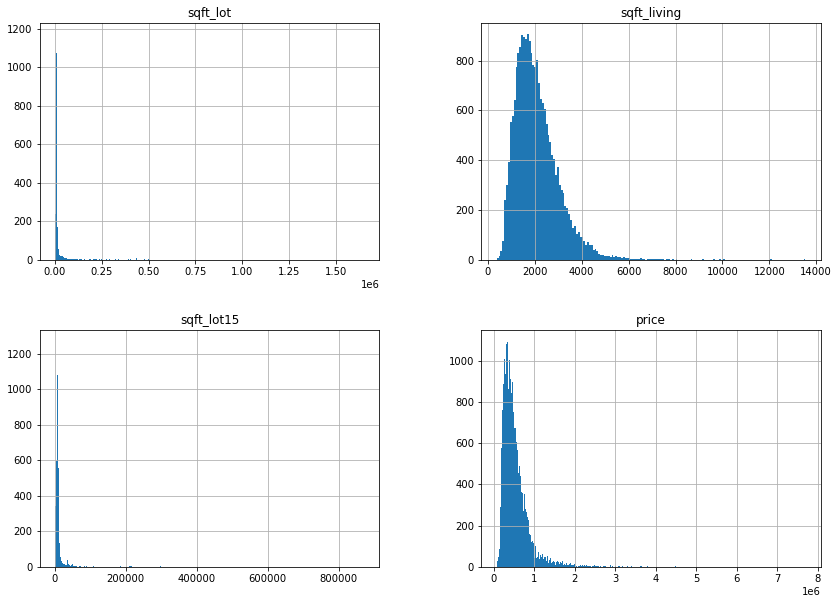

In [35]:
#distribution of continuous data
continuous = ['sqft_lot',  'sqft_living', 'sqft_lot15', 'price']
house_data[continuous].hist(figsize=(14,10), bins='auto');

Since the distributions above are non-normal, log transformation is used to transform the features. Scaling is also used because there is a high variation in the feature scales.

In [36]:
# function for log transformation and scaling 
def preprocessing_data(data, continuous):
    # log transformation
    log_names = [f'{column}_log' for column in data[continuous].columns]
    log_continuous = np.log(data[continuous])
    log_continuous.columns = log_names
    
    # scale the data
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(log_continuous), 
                               columns=log_continuous.columns, index=data.index)
    
    return scaled_data

In [37]:
# preprocess the X_train and X_test data 
continuous = ['sqft_lot',  'sqft_living', 'sqft_lot15']
processed_X_train = preprocessing_data(X_train, continuous)
processed_X_test = preprocessing_data(X_test, continuous)

In [38]:
# preview of the procesed X-train dataframe
processed_X_train.head(3)

,sqft_lot_log,sqft_living_log,sqft_lot15_log
13315,-0.344168,0.343393,-0.375805
19635,-0.533798,0.851753,-0.884666
19377,-0.725563,-0.527442,-0.751801


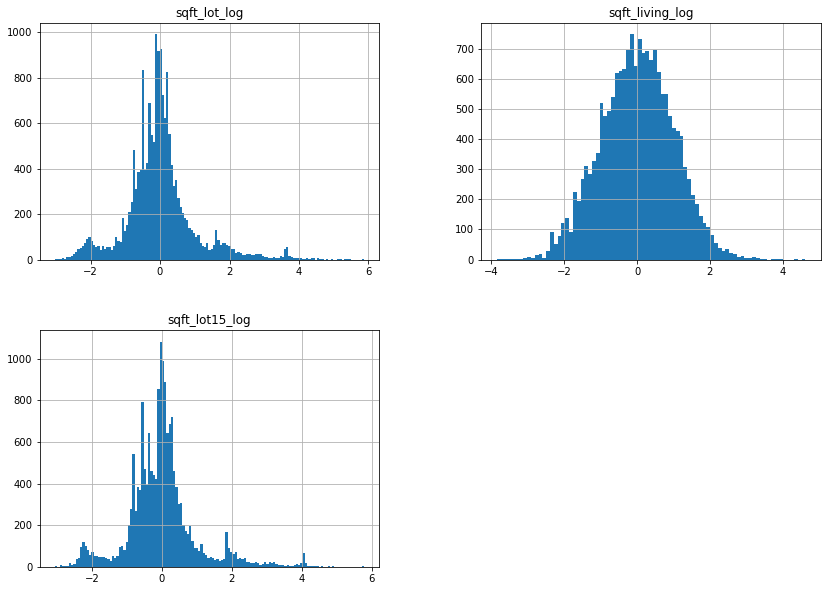

In [39]:
# distribution after log transformation and scaling 
processed_X_train.hist(figsize=(14, 10), bins='auto')
fig.tight_layout();

After log transformation and scaling, the histograms are more normally distributed.

In [40]:
# preprocess the y_train and y_test data(price column)
processed_y_train = preprocessing_data(y_train, ['price'])
processed_y_test = preprocessing_data(y_test, ['price'])

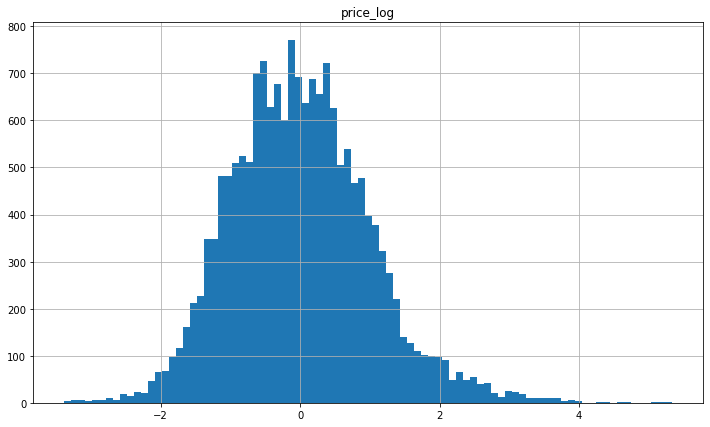

In [41]:
#price distribution after log transformation and scaling
processed_y_train.hist(figsize=(12, 7), bins='auto')
fig.tight_layout();

The histogram showing price distribution forms an almost normal distribution.

In [42]:
# drop the continuous columns from the dataset
# concatanate the remaining columns with the transformed continuous columns
X_train_processed = pd.concat([X_train.drop(continuous, axis=1), processed_X_train], axis=1)
X_test_processed = pd.concat([X_test.drop(continuous, axis=1), processed_X_test], axis=1)

In [43]:
# preview of the processed X-train data
X_train_processed.head(3)

,bedrooms,floors,waterfront,condition,house_age,renovations,sqft_lot_log,sqft_living_log,sqft_lot15_log
13315,4,2.0,0,3,7,not renovated,-0.344168,0.343393,-0.375805
19635,4,2.0,0,3,9,not renovated,-0.533798,0.851753,-0.884666
19377,3,2.0,0,3,10,not renovated,-0.725563,-0.527442,-0.751801


### Transform categorical variables

The categorical variables are bedrooms, floors, waterfront, condition and renovations. Bedrooms, floors and condition are ordinal variables while waterfront and renovations are binary variables. In this case, bedrooms, floors, condition and waterfront will be kept in the current form. Dummy variables will be created for the renovations column.

In [44]:
# Creating dummy variables for the categorical column renovations
categorical_col = ['renovations']
final_X_train = pd.get_dummies(X_train_processed, columns=categorical_col, drop_first=True)
final_X_test = pd.get_dummies(X_test_processed, columns=categorical_col, drop_first=True)
final_X_train.head(3)

,bedrooms,floors,waterfront,condition,house_age,sqft_lot_log,sqft_living_log,sqft_lot15_log,renovations_renovated
13315,4,2.0,0,3,7,-0.344168,0.343393,-0.375805,0
19635,4,2.0,0,3,9,-0.533798,0.851753,-0.884666,0
19377,3,2.0,0,3,10,-0.725563,-0.527442,-0.751801,0


## Modeling

### Baseline model

Sqft_living has the highest positive correlation with price. A baseline model can be built using only the sqft_living feature.

In [45]:
# model using sqft_living as the only predictive feature
baseline_model = LinearRegression()
baseline_model.fit(final_X_train[['sqft_living_log']], processed_y_train)
print(f'coefficient: {baseline_model.coef_}')
print(f'intercept: {baseline_model.intercept_}')
R_squared = baseline_model.score(final_X_test[['sqft_living_log']], processed_y_test)
print(f'R-squared score: {R_squared}')

coefficient: [[0.67335554]]
intercept: [1.47104714e-15]
R-squared score: 0.4644237901048155


In [46]:
# mean_squared_error of train and test data
train_mse = mean_squared_error(processed_y_train, baseline_model.predict(final_X_train[['sqft_living_log']]))
test_mse = mean_squared_error(processed_y_test, baseline_model.predict(final_X_test[['sqft_living_log']]))
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.5465923174308049
Test MSE: 0.5355762098951844


The baseline model has approximately 46% of variations in price that are explained by sqft_living_log. This is a quite low score. The model is performing a little better on the test data than on the train data.

### Second model with all the house features

In [96]:
# model using all house features
second_model = LinearRegression()
second_model.fit(final_X_train, processed_y_train)
print(f'coefficient: {second_model.coef_}')
print(f'intercept: {second_model.intercept_}')
R_squared = second_model.score(final_X_test, processed_y_test)
print(f'R-squared score: {R_squared}')

coefficient: [[-0.15967568  0.27449301  1.20209648  0.06592623  0.00787998 -0.06528569
   0.80926281 -0.01144921  0.12035797]]
intercept: [-0.45126109]
R-squared score: 0.5377683836965932


In [67]:
# mean_squared_error of train and test data
train_mse = mean_squared_error(processed_y_train, second_model.predict(final_X_train))
test_mse = mean_squared_error(processed_y_test, second_model.predict(final_X_test))
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.46664379604257633
Test MSE: 0.4622316163034067


The second model with all features has a better R-squared score than the baseline model. The MSE error for both train and test data is slightly lower. The model is performing better on the test data than on the train data.

### Third model - Stepwise selection of features using p-values

In [49]:
# function for stepwise selection of features using p-values
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [50]:
# selected features after calling the stepwise_selection function
import warnings
warnings.filterwarnings("ignore")
result = stepwise_selection(final_X_train, processed_y_train, verbose=True)
print('resulting features:')
print(result)

Add  bedrooms                       with p-value 0.0
Add  sqft_living_log                with p-value 0.0
Add  house_age                      with p-value 4.78763e-227
Add  floors                         with p-value 3.23088e-176
Add  waterfront                     with p-value 7.90457e-73
Add  sqft_lot_log                   with p-value 1.22577e-35
Add  condition                      with p-value 4.00866e-12
Add  renovations_renovated          with p-value 6.69701e-05
resulting features:
['bedrooms', 'sqft_living_log', 'house_age', 'floors', 'waterfront', 'sqft_lot_log', 'condition', 'renovations_renovated']


All features are selected except sqft_lot15_log which has a p value > 0.05. 

In [51]:
# list for the selected features
selected_by_pvalue = ['floors', 'sqft_living_log', 'house_age', 'bedrooms', 'waterfront', 
                      'sqft_lot_log', 'condition', 'renovations_renovated']

In [52]:
# model using the features selected
third_model = LinearRegression()
third_model.fit(final_X_train[selected_by_pvalue], processed_y_train)
print(f'coefficient: {third_model.coef_}')
print(f'intercept: {third_model.intercept_}')
R_squared = third_model.score(final_X_test[selected_by_pvalue], processed_y_test)
print(f'R-squared score: {R_squared}')

coefficient: [[ 0.27509639  0.80913486  0.00789975 -0.15949525  1.20055665 -0.0756923
   0.06546701  0.11961099]]
intercept: [-0.45202921]
R-squared score: 0.5377008434945822


In [53]:
# mean_squared_error of train and test data
train_mse = mean_squared_error(processed_y_train, third_model.predict(final_X_train[selected_by_pvalue]))
test_mse = mean_squared_error(processed_y_test, third_model.predict(final_X_test[selected_by_pvalue]))
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.4666637910508635
Test MSE: 0.46229915650541775


This model has a higher R-squared score than the baseline model. However, its R-squared score is slightly lower than the score of the second model. The model is performing better on the test data than on the train data. 

### Fourth model - Feature ranking with recursive feature elimination

Four best features are selected using recursive feature elimination.

In [54]:
# selecting features using recursive feature elimination
model_selected4 = LinearRegression()
selector = RFE(model_selected4, n_features_to_select=4)
selector = selector.fit(final_X_train, processed_y_train)
selected_columns = final_X_train.columns[selector.support_ ]
selected_columns

Index(['floors', 'waterfront', 'sqft_living_log', 'renovations_renovated'], dtype='object')

The features selected are floors, waterfront, sqft_living_log and renovations_renovated.

In [55]:
# model using the 4 selected features
X_train_selected4 = final_X_train[selected_columns]
model_selected4.fit(X_train_selected4, processed_y_train)
print(f'coefficient: {model_selected4.coef_}')
print(f'intercept: {model_selected4.intercept_}')
X_test_selected4 = final_X_test[selected_columns]
R_squared = model_selected4.score(X_test_selected4, processed_y_test)
print(f'R-squared score: {R_squared}')

coefficient: [[0.14647017 1.35624094 0.63173631 0.37968046]]
intercept: [-0.24087282]
R-squared score: 0.4873994087284256


In [56]:
# mean_squared_error of train and test data
train_mse = mean_squared_error(processed_y_train, model_selected4.predict(X_train_selected4))
test_mse = mean_squared_error(processed_y_test, model_selected4.predict(X_test_selected4))
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.5234613462988185
Test MSE: 0.5126005912715743


## Linear regression assumptions

The second model is the final model with the highest R-value and the lowest MSE errors. The assumptions of linear regression will be investigated using this model in order to understand how much the model violates the assumptions.

### Investigating linearity

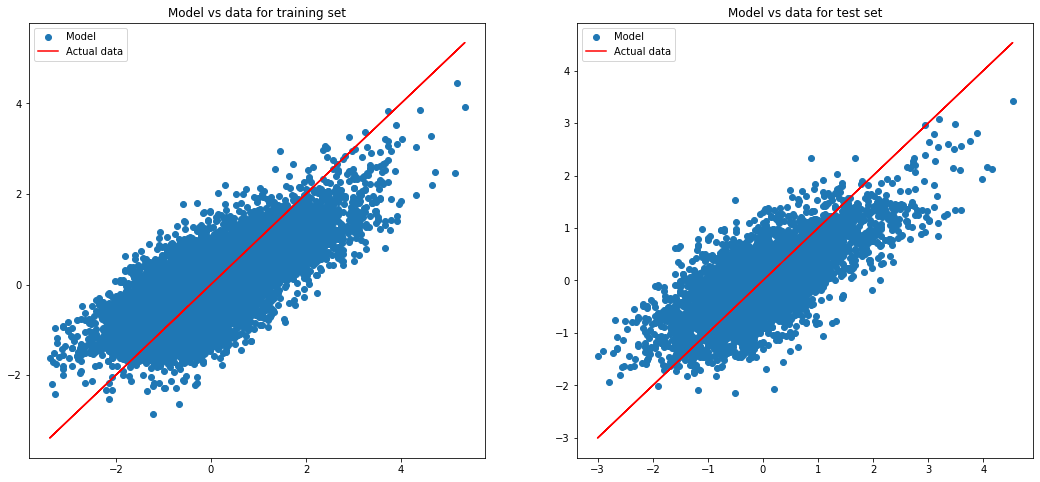

In [138]:
# scatter and line plots showing linearity
y_hat_test = second_model.predict(final_X_test)
y_hat_train = second_model.predict(final_X_train)
fig, axes = plt.subplots(ncols=2, figsize = (18,8))

#Train set
axes[0].scatter(processed_y_train, y_hat_train, label='Model')
axes[0].plot(processed_y_train['price_log'], processed_y_train['price_log'], label='Actual data', color='red')
axes[0].set_title('Model vs data for training set')
axes[0].legend();

# Test set
axes[1].scatter(processed_y_test, y_hat_test, label='Model')
axes[1].plot(processed_y_test['price_log'], processed_y_test['price_log'], label='Actual data',  color='red')
axes[1].set_title('Model vs data for test set')
axes[1].legend();

Based on the training set and the test set, there is a linear relationship between the target variable and the predictors. There are a few outliers in the dataset hence they cannot have a large negative impact on the model.

### Investigating Normality

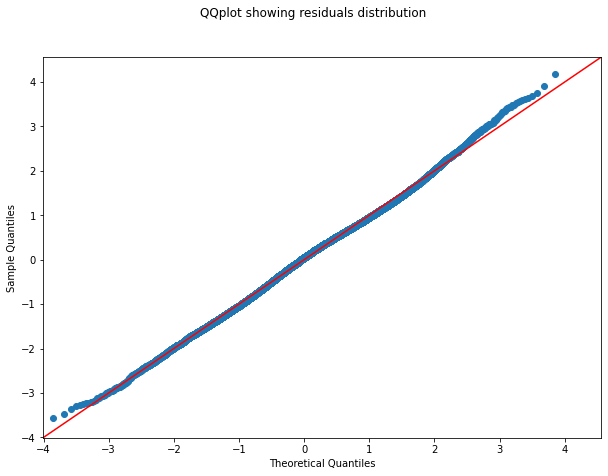

In [80]:
# residuals distribution using qqplots
fig, ax = plt.subplots(figsize=(10,7))
second_model = sm.OLS(processed_y_train, sm.add_constant(final_X_train)).fit()
residuals = second_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax)
fig.suptitle('QQplot showing residuals distribution');

The model residuals have a normal distribution.

### Investigating Homoscedasticity

In [88]:
# residual
residual = (processed_y_test - y_hat_test)

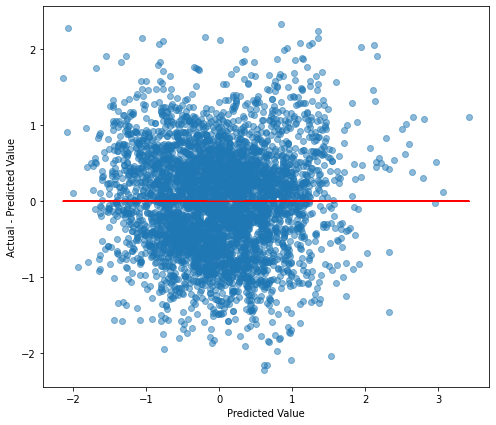

In [101]:
# scatter and line plots showing homoscedasticity
fig, ax = plt.subplots(figsize=(8,7))
second_model = sm.OLS(processed_y_train, sm.add_constant(final_X_train)).fit()
ax.scatter(y_hat_test, residual, alpha=0.5)
ax.plot(y_hat_test, [0 for i in range(len(final_X_test))], color='red')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

The shape above is not cone-like, hence the homoscedascity assumption is met. The residuals are almost equal across the regression line.

## Conclusions and recommendations
The final model will mainly be used for predictive purposes.  It can also be used for inferential purposes since none of the assumptions of linear regression has been violated. Most of the house features were found to have a significant effect on the price of houses. When various features were selected using various methods, the performance of the model was lower than that of the model with all the predictive features. The house features used for prediction, with a significant effect on the price value include:
- Floors: number of floors in the house. A house with more floors is likely to have a higher sales price.
- Sqft_living: footage of the home. The larger the footage of the home, the higher sales price of the house.
- House_age: age of the house. It is the difference between the time when the house was built and when it was sold. As the house age increases, the price of the home decreases.
- Bedrooms: number of bedrooms. The more the bedrooms, the higher the sales price.
- Waterfront: house which has a view to a waterfront. The houses with a view to a waterfront have higher sales price than those without a view to a waterfront.
- Sqft_lot: footage of the lot. The larger the footage of the lot, the higher sales price of the house.
- Condition: how good the condition is (Overall). A house with a good overall condition has a high sales price.
- Renovations: whether a house has been renovated. When a house is renovated, it's sales price increases.

The real estate agency should advise the homeowners to renovate their homes before selling in order to improve the sale price of the house.

## Future work

- Other types of modeling other than linear regression should be applied to determine the model that has the highest performance.
- In the real estate industry, the price of houses  may be affected by other factors such as consumer sentiment, credit availability, inflation and other economic factors. Data should be collected on these external factors and the model adjusted based on the effects of these factors.